# 02. Neural Network Classification

classification problem : binary classification : is it one thing or another

Is it a spam or not a spam

Multiclass classification : is it a photo of a pizza, sushi or steak (we can have any number of classes). One photo, one classification among many

Multilabel classification: Predict what categories should be assigned to a Wikipedia article. One sample, multiple labels

### what are we going to cover


* Architecture of a classification model
* Input shapes and output shapes
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
* The power of non-linearity
* Evaluating classification models

### Typical architecture of a classification neural network

* An input layer
* Some hidden layers
* An output layer


<table>
<thead><tr><td>Hyperparameter</td><td>Binary Classification</td><td>Multiclass classification</td></tr></thead>
<tbody><tr><td>Input layer shape</td><td>Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)</td><td>Same as binary classification</td></tr>
<tr><td>Hidden layer(s)</td><td>Problem specific, minimum = 1, maximum = unlimited</td><td>Same as binary classification</td></tr>
<tr><td>Neurons per hidden layer</td><td>Problem specific, generally 10 to 100</td><td>Same as binary classification</td></tr>
<tr><td>Output layer shape 	</td><td>1 (one class or the other) 	</td><td>1 per class (e.g. 3 for food, person or dog photo)</td></tr>
<tr><td>Hidden activation 	</td><td>Usually ReLU (rectified linear unit) 	</td><td>Same as binary classification</td></tr>
<tr><td>Output activation 	</td><td>Sigmoid 	</td><td>Softmax</td></tr>
<tr><td>Loss function 	</td><td>Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow) 	</td><td>Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)</td></tr>
<tr><td>Optimizer 	</td><td>SGD (stochastic gradient descent), Adam 	</td><td>Same as binary classification</td></tr>
</tbody>
</table>

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

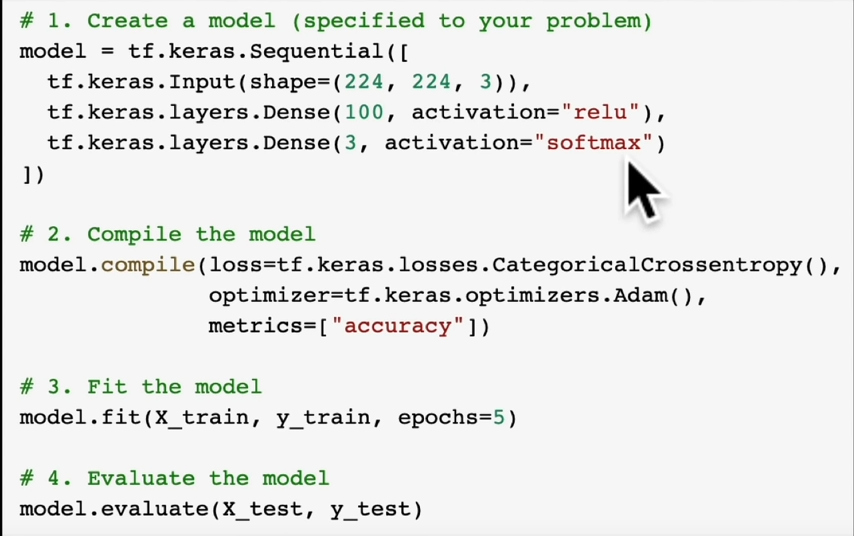

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


### Creating data to view and fit

To predict classification, we'll use Scikit-Learn's make_circles() function.

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [4]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Vizualize the data

To do that, we use a dataframe

In [6]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


What kind of labels do we have?

In [7]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

We have only two labels : 0 and 1 . So it is a binary classification problem

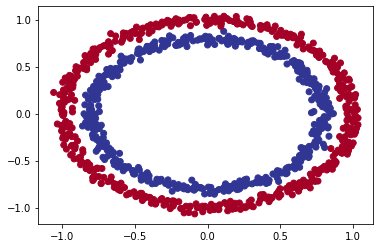

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Classify red or blue dots


See https://playground.tensorflow.org

### Input and output shapes

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Two X features which lead to one y value.

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value

### Steps in modelling

In TensorFlow, here are the typical steps to create and train a model.

1. Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).
4. Evaluate the model
5. Tweak
6. Evaluate ...


In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [13]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]



Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?


In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [15]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

Still not even as good as guessing (~50% accuracy).

We need to improve our model

### Improving our model

* Adding some layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer





In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data


In [17]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

Absolutely no improvement

Let's visualize what is happening

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).


**To solve our problem we can use the He initialization like in :
https://github.com/oceane-sailorin/deeplearning-ai/blob/master/hyperparameter-tuning-regularization-optimization/Initialization.ipynb**

Here are other possibilities

In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Let's try our function to plot our model's decision boundary

doing binary classifcation...


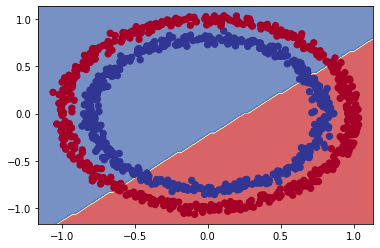

In [19]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)

The main issue is our data isn't separable by a straight line.

### The missing piece: Non-linearity

Let's replicate our model on  TensorFlow Playground

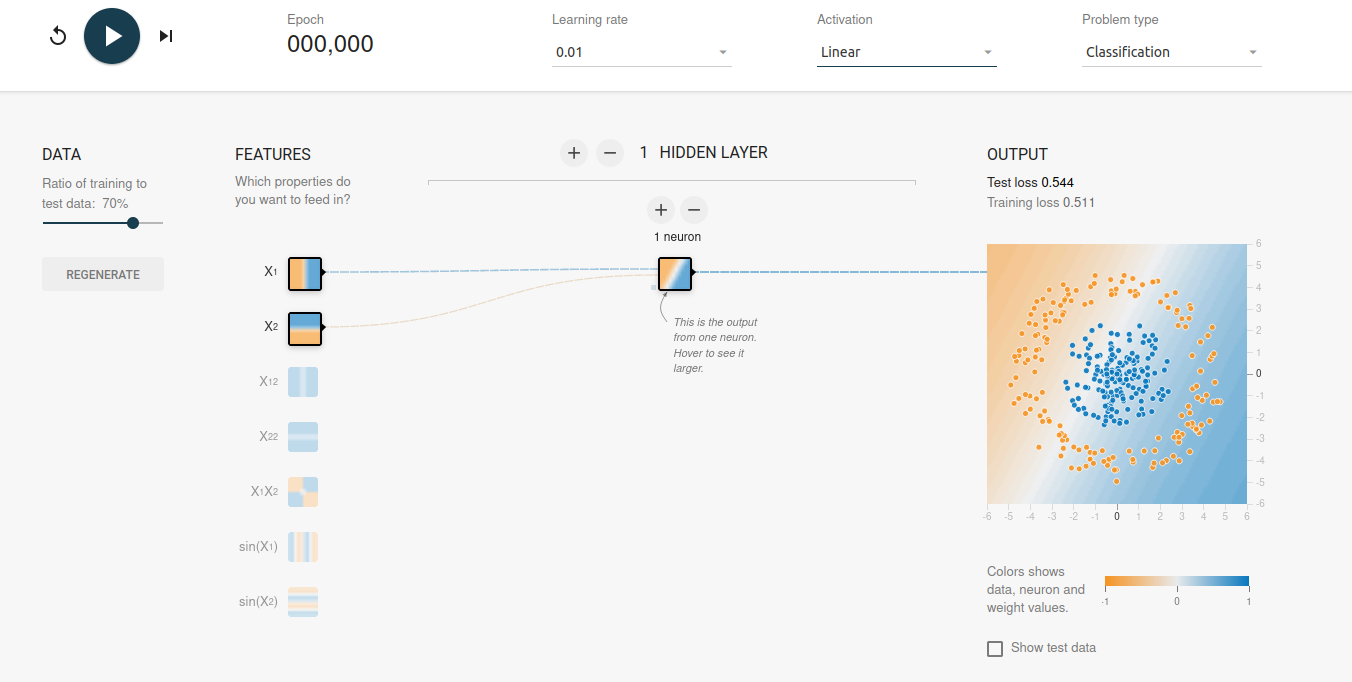

The main change we'll add to models we've built before is the use of the activation keyword.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/

Still no improvement

Let's visualize

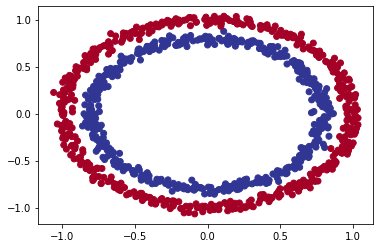

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classifcation...


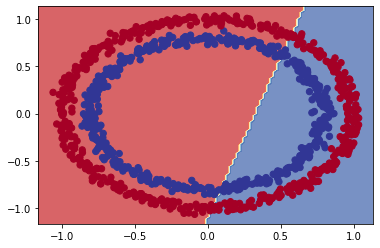

In [22]:
# Check the decision boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

We still have straight lines

But our data are not linear

We need to remove some linearity

In [25]:
# Set random seed
tf.random.set_seed(42)


# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

                        
# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

Let's increase number of neurons and layers

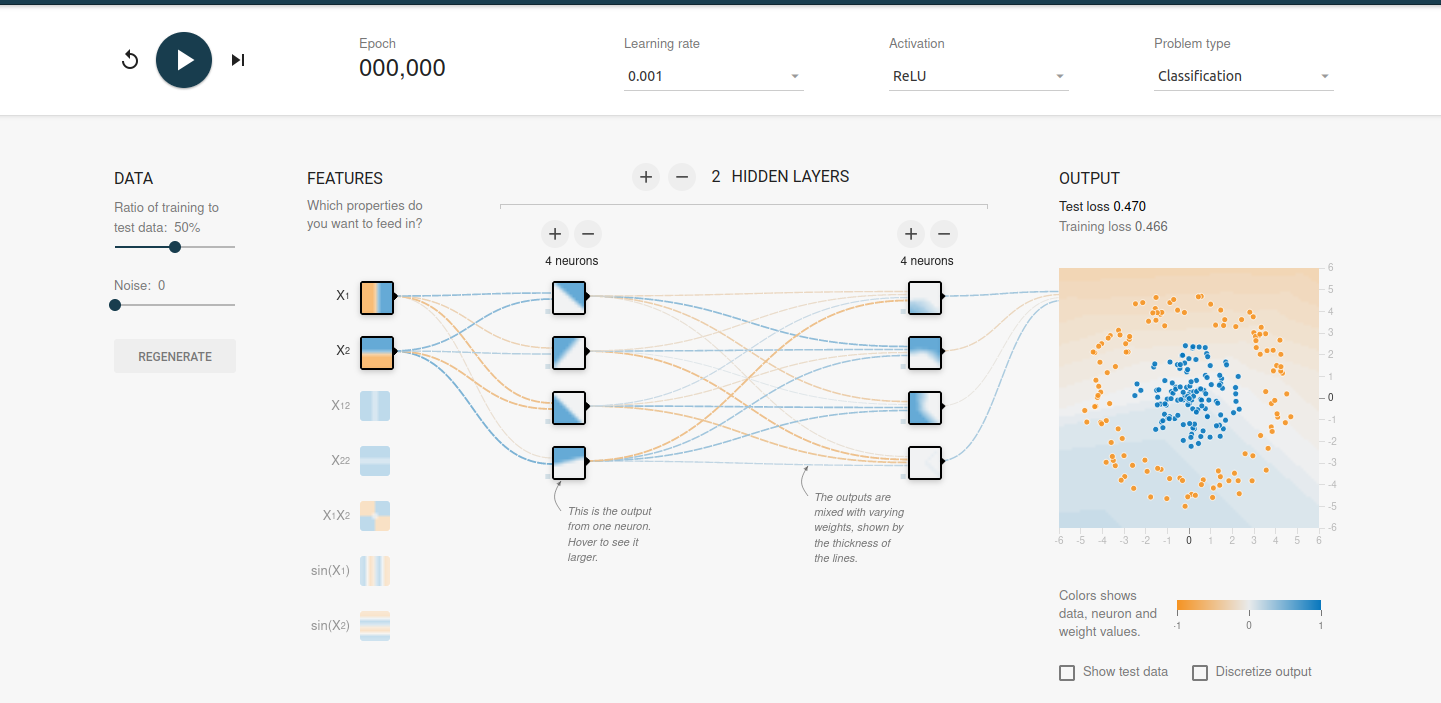

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

No improvement

Let's visualize

doing binary classifcation...


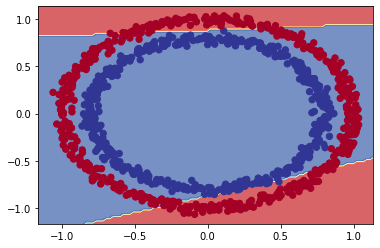

In [28]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

We still have straight lines

We are now going to change the activation functions for the output layer